In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('breast-cancer-wisconsin.csv')
df = pd.DataFrame(dataset)
df.columns = ['id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df = df[df.Bare_Nuclei != '?']
df

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [2]:
df.shape

(682, 11)

In [0]:
from sklearn.model_selection import train_test_split
X = df[['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [14]:
from datetime import datetime
start=datetime.now()

from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred_knn)) 
print(classification_report(y_test, y_pred_knn))

print (datetime.now()-start)

[[134   2]
 [  7  62]]
              precision    recall  f1-score   support

           2       0.95      0.99      0.97       136
           4       0.97      0.90      0.93        69

    accuracy                           0.96       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.96      0.96      0.96       205

0:00:00.010575


In [0]:
from sklearn.model_selection import train_test_split
X = df[['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

In [18]:
from datetime import datetime
start=datetime.now()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

print (datetime.now()-start)

[[134   3]
 [  1  67]]
              precision    recall  f1-score   support

           2       0.99      0.98      0.99       137
           4       0.96      0.99      0.97        68

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

0:00:00.011024


In [0]:
from sklearn import metrics 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_bft = clf.predict(X_test)

In [29]:
from datetime import datetime
start=datetime.now()

from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred_bft)) 
print(classification_report(y_test, y_pred_bft))

print (datetime.now()-start)

[[128   6]
 [  7  64]]
              precision    recall  f1-score   support

           2       0.95      0.96      0.95       134
           4       0.91      0.90      0.91        71

    accuracy                           0.94       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205

0:00:00.013751


0:00:00.687523


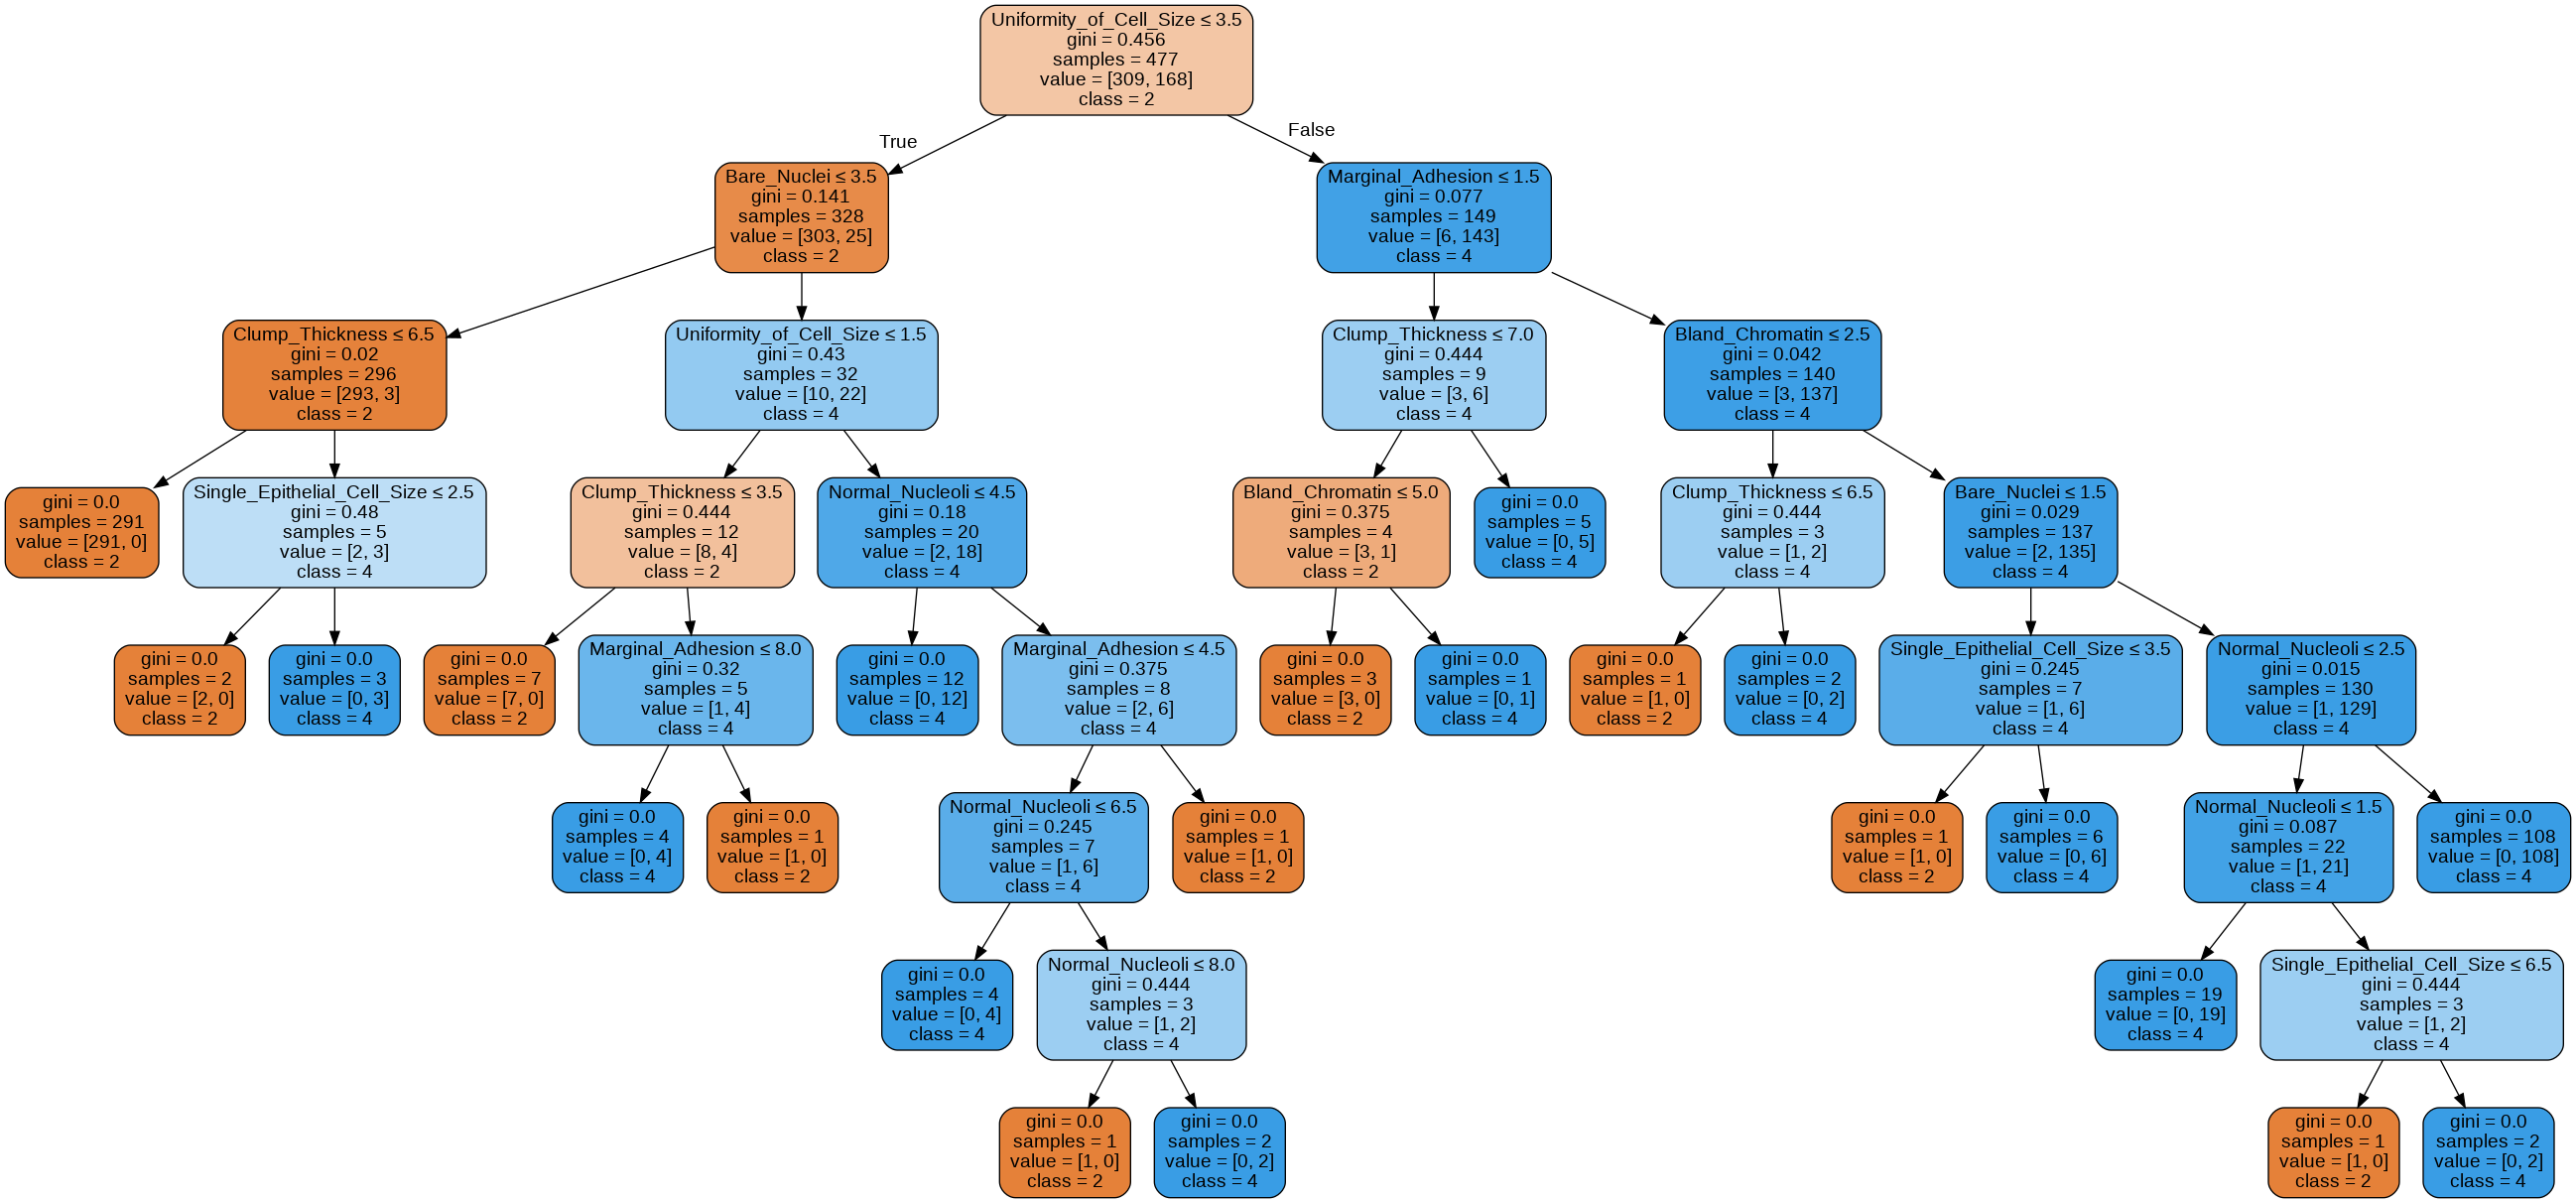

In [32]:
from datetime import datetime
start=datetime.now()

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breast_Cancer.png')
print (datetime.now()-start)
Image(graph.create_png())
